In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('trade_data.csv')

In [3]:
df.head()

,Year,Trade Flow,Reporter,Reporter ISO,Partner Code,Partner,Partner ISO,Commodity Code,Commodity,Trade Value (US$)
0,2014,Export,Rep. of Moldova,MDA,0,World,WLD,0,Food and live animals,619748863
1,2014,Import,Rep. of Moldova,MDA,0,World,WLD,0,Food and live animals,543187848
2,2014,Re-Export,Rep. of Moldova,MDA,0,World,WLD,0,Food and live animals,56900165
3,2014,Export,Rep. of Moldova,MDA,8,Albania,ALB,0,Food and live animals,15424
4,2014,Export,Rep. of Moldova,MDA,31,Azerbaijan,AZE,0,Food and live animals,570113


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19093 entries, 0 to 19092
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Year               19093 non-null  int64 
 1   Trade Flow         19093 non-null  object
 2   Reporter           19093 non-null  object
 3   Reporter ISO       19093 non-null  object
 4   Partner Code       19093 non-null  int64 
 5   Partner            19093 non-null  object
 6   Partner ISO        18719 non-null  object
 7   Commodity Code     19093 non-null  object
 8   Commodity          19093 non-null  object
 9   Trade Value (US$)  19093 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 1.5+ MB


In [5]:
df['trade_value']=df['Trade Value (US$)']/1000
df['trade_value']=df['trade_value'].round(1).astype(int)

In [6]:
df.round({'trade_value':0})

,Year,Trade Flow,Reporter,Reporter ISO,Partner Code,Partner,Partner ISO,Commodity Code,Commodity,Trade Value (US$),trade_value
0,2014,Export,Rep. of Moldova,MDA,0,World,WLD,0,Food and live animals,619748863,619748
1,2014,Import,Rep. of Moldova,MDA,0,World,WLD,0,Food and live animals,543187848,543187
2,2014,Re-Export,Rep. of Moldova,MDA,0,World,WLD,0,Food and live animals,56900165,56900
3,2014,Export,Rep. of Moldova,MDA,8,Albania,ALB,0,Food and live animals,15424,15
4,2014,Export,Rep. of Moldova,MDA,31,Azerbaijan,AZE,0,Food and live animals,570113,570
...,...,...,...,...,...,...,...,...,...,...,...
19088,2013,Import,Rep. of Moldova,MDA,899,"Areas, nes",NaN,4,"Animal and vegetable oils, fats and waxes",28060,28
19089,2013,Export,Rep. of Moldova,MDA,887,Yemen,YEM,0,Food and live animals,13564,13
19090,2013,Import,Rep. of Moldova,MDA,899,"Areas, nes",NaN,0,Food and live animals,1142398,1142
19091,2013,Export,Rep. of Moldova,MDA,899,"Areas, nes",NaN,0,Food and live animals,2161847,2161


In [7]:
df = df.pivot_table('trade_value', ['Year', 'Partner', 'Partner ISO', 'Commodity Code', 'Commodity'], 'Trade Flow')

In [8]:
df.reset_index( drop=False, inplace=True )


In [9]:
df.reindex(['Year', 'Partner', 'Partner ISO', 'Commodity Code', 'Commodity', 'Export', 'Import', 'Re-Export'], axis=1)


Trade Flow,Year,Partner,Partner ISO,Commodity Code,Commodity,Export,Import,Re-Export
0,2009,Afghanistan,AFG,3,"Mineral fuels, lubricants and related materials",8.0,NaN,NaN
1,2009,Afghanistan,AFG,6,Manufactured goods classified chiefly by material,17.0,NaN,9.0
2,2009,Afghanistan,AFG,7,Machinery and transport equipment,658.0,NaN,564.0
3,2009,Afghanistan,AFG,8,Miscellaneous manufactured articles,24.0,NaN,23.0
4,2009,Afghanistan,AFG,TOTAL,All Commodities,708.0,NaN,596.0
...,...,...,...,...,...,...,...,...
10664,2018,Zambia,ZMB,0,Food and live animals,NaN,2.0,NaN
10665,2018,Zambia,ZMB,2,"Crude materials, inedible, except fuels",NaN,0.0,NaN
10666,2018,Zambia,ZMB,TOTAL,All Commodities,NaN,2.0,NaN
10667,2018,Brunei Darussalam,BRN,8,Miscellaneous manufactured articles,3.0,0.0,NaN


In [10]:
df.fillna(0)

Trade Flow,Year,Partner,Partner ISO,Commodity Code,Commodity,Export,Import,Re-Export
0,2009,Afghanistan,AFG,3,"Mineral fuels, lubricants and related materials",8.0,0.0,0.0
1,2009,Afghanistan,AFG,6,Manufactured goods classified chiefly by material,17.0,0.0,9.0
2,2009,Afghanistan,AFG,7,Machinery and transport equipment,658.0,0.0,564.0
3,2009,Afghanistan,AFG,8,Miscellaneous manufactured articles,24.0,0.0,23.0
4,2009,Afghanistan,AFG,TOTAL,All Commodities,708.0,0.0,596.0
...,...,...,...,...,...,...,...,...
10664,2018,Zambia,ZMB,0,Food and live animals,0.0,2.0,0.0
10665,2018,Zambia,ZMB,2,"Crude materials, inedible, except fuels",0.0,0.0,0.0
10666,2018,Zambia,ZMB,TOTAL,All Commodities,0.0,2.0,0.0
10667,2018,Brunei Darussalam,BRN,8,Miscellaneous manufactured articles,3.0,0.0,0.0


In [11]:
df['Domestic Export']=df['Export']-df['Re-Export']

In [12]:
df=df.replace(np.nan, 0)

In [13]:
df.head()

Trade Flow,Year,Partner,Partner ISO,Commodity Code,Commodity,Export,Import,Re-Export,Domestic Export
0,2009,Afghanistan,AFG,3,"Mineral fuels, lubricants and related materials",8.0,0.0,0.0,0.0
1,2009,Afghanistan,AFG,6,Manufactured goods classified chiefly by material,17.0,0.0,9.0,8.0
2,2009,Afghanistan,AFG,7,Machinery and transport equipment,658.0,0.0,564.0,94.0
3,2009,Afghanistan,AFG,8,Miscellaneous manufactured articles,24.0,0.0,23.0,1.0
4,2009,Afghanistan,AFG,TOTAL,All Commodities,708.0,0.0,596.0,112.0


In [14]:
df['Export']=df['Export'].round(1).astype(int)
df['Import']=df['Import'].round(1).astype(int)
df['Re-Export']=df['Re-Export'].round(1).astype(int)
df['Domestic Export']=df['Domestic Export'].round(1).astype(int)

In [15]:
df_total=df[(df['Partner']=='World')&(df['Commodity Code']=='TOTAL')]

In [16]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 966 to 10561
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Year             10 non-null     int64 
 1   Partner          10 non-null     object
 2   Partner ISO      10 non-null     object
 3   Commodity Code   10 non-null     object
 4   Commodity        10 non-null     object
 5   Export           10 non-null     int32 
 6   Import           10 non-null     int32 
 7   Re-Export        10 non-null     int32 
 8   Domestic Export  10 non-null     int32 
dtypes: int32(4), int64(1), object(4)
memory usage: 640.0+ bytes


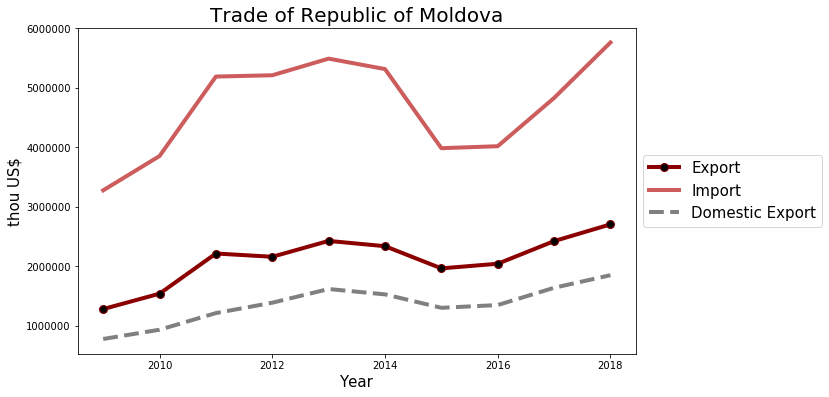

In [17]:
plt.figure(figsize=(10,6))
plt.plot( 'Year', 'Export', data=df_total, marker='o', markerfacecolor='black', markersize=8, color='darkred', linewidth=4)
plt.plot( 'Year', 'Import', data=df_total, marker='', color='indianred', linewidth=4)
plt.plot( 'Year', 'Domestic Export', data=df_total, marker='', color='gray', linewidth=4, linestyle='dashed')
plt.title('Trade of Republic of Moldova', fontsize=20)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('thou US$', fontsize = 15)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=15)

plt.savefig('linechart_1.png', bbox_inches='tight')



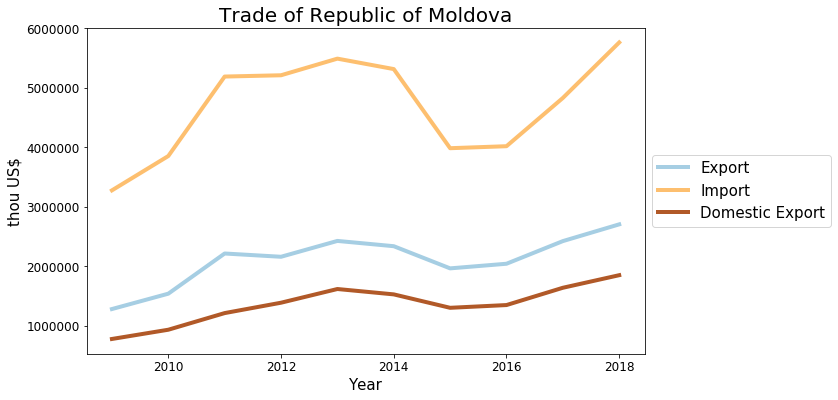

In [35]:
ax=df_total.plot(kind='line', x='Year', y=['Export', 'Import', 'Domestic Export'], title = 'Trade of Republic of Moldova', figsize=(10,6),linewidth = 4, colormap='Paired',legend=True, fontsize=12)
ax.set_ylabel('Thou US$')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=15)
plt.title('Trade of Republic of Moldova', fontsize=20)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('thou US$', fontsize = 15)

ax.figure.savefig('linechart_2.png', bbox_inches='tight')


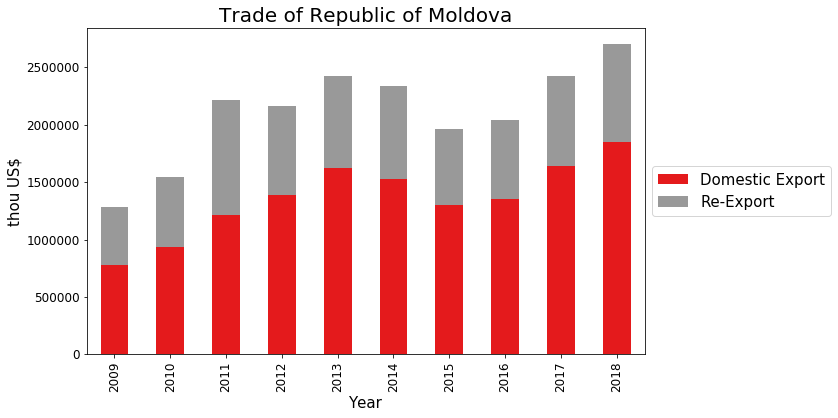

In [36]:
ax=df_total.plot(kind='bar', stacked=True, x='Year', y=['Domestic Export', 'Re-Export'], title = 'Trade of Republic of Moldova', colormap='Set1', figsize=(10,6), legend=True, fontsize=12)
ax.set_ylabel('Thou US$')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=15)
plt.title('Trade of Republic of Moldova', fontsize=20)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('thou US$', fontsize = 15)

ax.figure.savefig('stacked_bars.png', bbox_inches='tight')


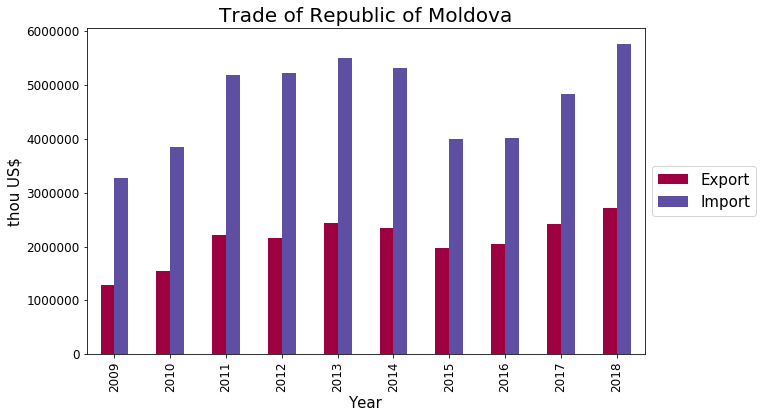

In [37]:
ax=df_total.plot(kind='bar', x='Year', y=['Export', 'Import'], colormap = 'Spectral', title = 'Trade of Republic of Moldova', figsize=(10,6), legend=True, fontsize=12)
ax.set_ylabel('Thou US$')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=15)
plt.title('Trade of Republic of Moldova', fontsize=20)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('thou US$', fontsize = 15)

ax.figure.savefig('bars.png', bbox_inches='tight')

In [21]:
products=df[(df['Partner']=='World')&(df['Year']==2018)&(df['Commodity Code']!='TOTAL')]

In [22]:
products.info

<bound method DataFrame.info of Trade Flow  Year Partner Partner ISO Commodity Code  \
10551       2018   World         WLD              0   
10552       2018   World         WLD              1   
10553       2018   World         WLD              2   
10554       2018   World         WLD              3   
10555       2018   World         WLD              4   
10556       2018   World         WLD              5   
10557       2018   World         WLD              6   
10558       2018   World         WLD              7   
10559       2018   World         WLD              8   
10560       2018   World         WLD              9   

Trade Flow                                          Commodity  Export  \
10551                                   Food and live animals  613056   
10552                                   Beverages and tobacco  218902   
10553                 Crude materials, inedible, except fuels  280008   
10554         Mineral fuels, lubricants and related materials   18462 

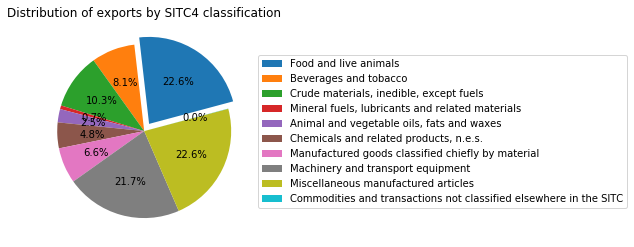

In [50]:
labels=products['Commodity']
explode=(0.1,0,0,0,0,0,0,0,0,0)
plt.pie(products['Export'], autopct='%1.1f%%', startangle=15, explode=explode)
plt.legend(labels=labels, loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=10)
plt.title('Distribution of exports by SITC4 classification')

plt.savefig('pie_chart.png', bbox_inches='tight')



In [24]:
trade_2018=df[(df['Partner']!='World')&(df['Year']==2018)&(df['Commodity Code']=='TOTAL')&(df['Export']>100)]

In [25]:
trade_2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 9523 to 10647
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Year             100 non-null    int64 
 1   Partner          100 non-null    object
 2   Partner ISO      100 non-null    object
 3   Commodity Code   100 non-null    object
 4   Commodity        100 non-null    object
 5   Export           100 non-null    int32 
 6   Import           100 non-null    int32 
 7   Re-Export        100 non-null    int32 
 8   Domestic Export  100 non-null    int32 
dtypes: int32(4), int64(1), object(4)
memory usage: 6.2+ KB


In [26]:
df['Trade Balance']=df['Export']-df['Import']

In [27]:
df.head()

Trade Flow,Year,Partner,Partner ISO,Commodity Code,Commodity,Export,Import,Re-Export,Domestic Export,Trade Balance
0,2009,Afghanistan,AFG,3,"Mineral fuels, lubricants and related materials",8,0,0,0,8
1,2009,Afghanistan,AFG,6,Manufactured goods classified chiefly by material,17,0,9,8,17
2,2009,Afghanistan,AFG,7,Machinery and transport equipment,658,0,564,94,658
3,2009,Afghanistan,AFG,8,Miscellaneous manufactured articles,24,0,23,1,24
4,2009,Afghanistan,AFG,TOTAL,All Commodities,708,0,596,112,708


In [28]:
scatter=df[(df['Partner']=='World')&(df['Commodity Code']=='TOTAL')]

In [29]:
scatter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 966 to 10561
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Year             10 non-null     int64 
 1   Partner          10 non-null     object
 2   Partner ISO      10 non-null     object
 3   Commodity Code   10 non-null     object
 4   Commodity        10 non-null     object
 5   Export           10 non-null     int32 
 6   Import           10 non-null     int32 
 7   Re-Export        10 non-null     int32 
 8   Domestic Export  10 non-null     int32 
 9   Trade Balance    10 non-null     int32 
dtypes: int32(5), int64(1), object(4)
memory usage: 680.0+ bytes


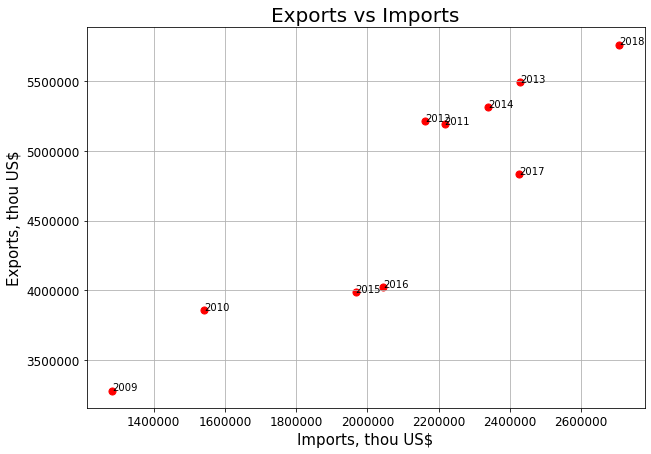

In [46]:
ax = scatter.plot(kind='scatter',x='Export',y='Import',figsize=(10,7), c='red', grid=True, s=50, fontsize=12)
scatter[['Export','Import','Year']].apply(lambda row: ax.text(*row),axis=1);
plt.title('Exports vs Imports', fontsize=20)
plt.xlabel('Imports, thou US$', fontsize = 15)
plt.ylabel('Exports, thou US$', fontsize = 15)

plt.savefig('scatterplot.png')




In [31]:
hist=df[(df['Partner']!='World')&(df['Year']==2018)&(df['Commodity Code']=='TOTAL')]

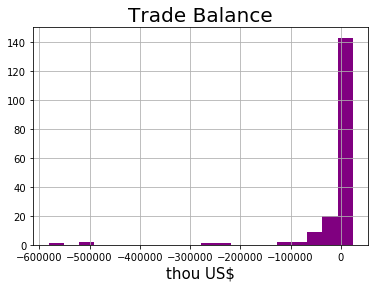

In [47]:
hist['Trade Balance'].hist(bins=20, color='purple')
plt.title('Trade Balance', fontsize=20)
plt.xlabel('thou US$', fontsize = 15)
plt.savefig('histogram.png')